print("hello world")

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示为方块的问题


df = pd.read_excel("data.xls",header=2)
#print(df.head())#打印读取到的数据
#print("--------------------------")
#print(df.info())#打印DataFrame的结构信息,每一列

In [2]:
# 从df中筛选出某些"指标"的数据，并把每年的数据整理成时间序列
def get_time_series(df, indicators):
    #按指标过滤行
    mask = df['指标'].isin(indicators)#判断indicators是否在指标中返回一个布尔序列
    #print(mask)
    sub_df = df[mask].copy()#保留指标这一列中mask中为True的行
    #print(sub_df[0:3])

    #把指标这一列变成表格的行名，去除一开始的数字索引
    sub_df.set_index('指标', inplace=True)
    #print(sub_df[0:3])
    '''
                          2024年    2023年    2022年     2021年     2020年     2019年  \
    指标                                                                            
    研究与试验发展人员全时当量(万人年)    774.5    724.1    635.4    571.60    523.45    480.08   
    研究与试验发展经费支出(亿元)     36130.0  33357.1  30782.9  27956.31  24393.11  22143.60   

    '''

    # 转置
    sub_df = sub_df.T
    #print(sub_df[0:3])
    '''
    指标     研究与试验发展人员全时当量(万人年)  研究与试验发展经费支出(亿元)
    2024年               774.5          36130.0
    2023年               724.1          33357.1
    2022年               635.4          30782.9    
    '''

    #时间从最近到之前，反转为从之前到现在
    sub_df = sub_df.iloc[::-1] 
    #print(sub_df[0:3])

    '''
    指标     研究与试验发展人员全时当量(万人年)  研究与试验发展经费支出(亿元)
    2015年              375.88         14169.88
    2016年              387.81         15676.75
    2017年              403.36         17606.13
    '''
    return sub_df

# 定义要输入的indicators
input_indicators = ['研究与试验发展经费支出(亿元)', '研究与试验发展人员全时当量(万人年)']
structure_indicators = ['研究与试验发展基础研究经费支出(亿元)', '研究与试验发展应用研究经费支出(亿元)', '研究与试验发展试验发展经费支出(亿元)','研究与试验发展政府资金经费支出(亿元)','研究与试验发展企业资金经费支出(亿元)']
output_indicators = ['发表科技论文(万篇)',
                     '出版科技著作(种)',
                     '科技成果登记数(项)',
                     '专利申请数(项)',
                     '发明专利申请数(项)', 
                     '专利申请授权数(项)',
                     '发明专利申请授权数(项)',
                     '国家技术发明奖(项)',
                     '国家科学技术进步奖(项)'
                     ]

#提取数据
df_input = get_time_series(df, input_indicators)
df_structure = get_time_series(df, structure_indicators)
df_output = get_time_series(df, output_indicators)

#print(df_input.index.str.replace('年',' ').astype(int))#把年去掉并且转换类型为int
'''
Index([2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024], dtype='int64')
'''

df_input.index = df_input.index.str.replace('年', '').astype(int)
df_structure.index = df_structure.index.str.replace('年', '').astype(int)
df_output.index = df_output.index.str.replace('年', '').astype(int)
#查看前几行和后几行

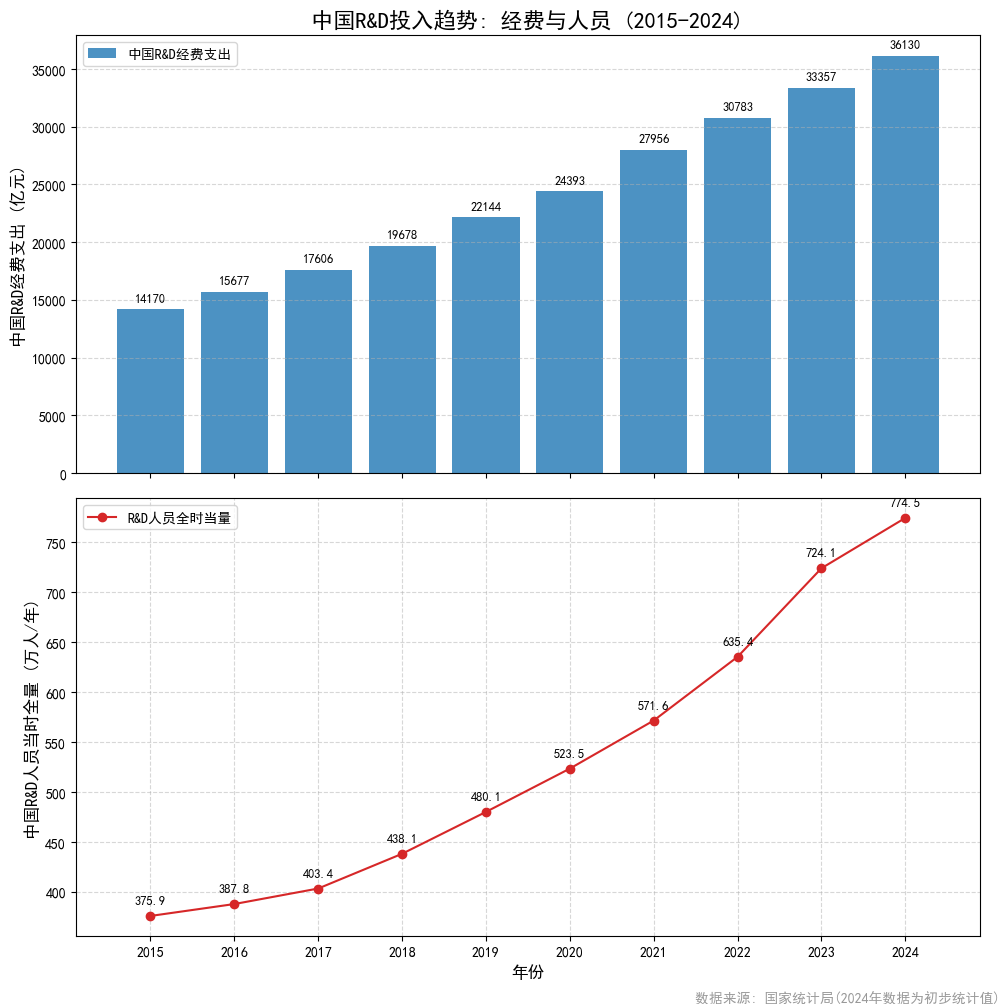

In [3]:
# 数据
years_input = df_input.index
expenditure = df_input['研究与试验发展经费支出(亿元)']
personnel = df_input['研究与试验发展人员全时当量(万人年)']

# --- 图1: R&D 投入趋势 ---
fig,(ax1,ax2)=plt.subplots(2,1,figsize=(10,10),sharex=True) #共享x轴

#子图1: 经费关系
ax1.bar(years_input,expenditure,color='#1f77b4',alpha=0.8,label='中国R&D经费支出')
ax1.set_ylabel('中国R&D经费支出 (亿元)',fontsize=12)
ax1.set_title("中国R&D投入趋势: 经费与人员 (2015-2024)",fontsize=16,fontweight='bold')
ax1.grid(axis='y',linestyle='--',alpha=0.5) #y轴方向画网格线，线条为虚线，透明度为50%
ax1.legend(loc='upper left') #显示图例放在左上角

#添加数值标签
for x,y in zip(years_input,expenditure):
    ax1.text(x,y+500,f'{y:.0f}',ha='center',va='bottom',fontsize=9)#水平居中，文字底部对齐

#子图2: 人员
ax2.plot(years_input,personnel,color='#d62728',marker='o',label='R&D人员全时当量')
ax2.set_xlabel('年份',fontsize=12) #x轴标识
ax2.set_ylabel('中国R&D人员当时全量 (万人/年)',fontsize=12)
ax2.grid(True,linestyle='--',alpha=0.5) #x和y轴都开启网格线
ax2.legend(loc='upper left')
ax2.set_xticks(years_input) #显示x轴的每一个坐标

#添加数值标签
for x,y in zip(years_input,personnel):
    ax2.text(x,y+10,f'{y:.1f}',ha='center',va='bottom',fontsize=9)

plt.tight_layout() #整个图自动紧密排版，避免子图之间的内容互相遮挡

#右下角添加数据来源
plt.annotate(
    "数据来源: 国家统计局(2024年数据为初步统计值)",
    xy=(1,0),xycoords='figure fraction', #以图坐标比例显示
    ha='right',va='bottom',
    fontsize=10,color='gray',alpha=0.8
)

plt.show()





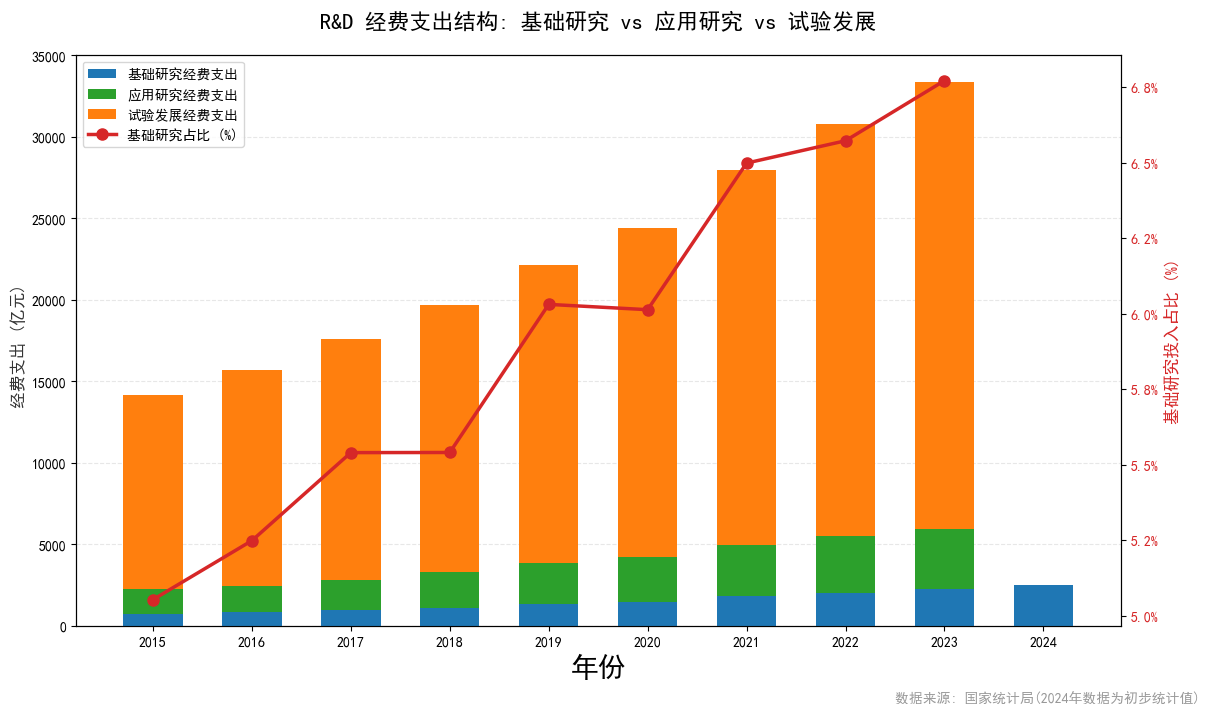

In [4]:
#数据处理
basic=df_structure['研究与试验发展基础研究经费支出(亿元)']
applied=df_structure['研究与试验发展应用研究经费支出(亿元)']
experimental=df_structure['研究与试验发展试验发展经费支出(亿元)']

# --- 图 2 : R&D 结构 (堆叠柱状图) ---
fig2,ax=plt.subplots(figsize=(12,7))
bar_width=0.6

#绘制堆叠柱
#底部是基础研究
p1=ax.bar(years_input,basic,width=bar_width,label="基础研究经费支出",color="#1f77b4",zorder=10)#zorder值大元素会覆盖在值小的元素上面

#中间是应用研究
p2=ax.bar(years_input,applied,width=bar_width,label="应用研究经费支出",color='#2ca02c',bottom=basic, zorder=10)

#顶部是试验研究
p3=ax.bar(years_input,experimental,width=bar_width,label="试验发展经费支出",color='#ff7f0e', bottom=basic+applied,zorder=10)

#添加基础研究占比折线
basic_ratio=(basic/expenditure)*100

ax2=ax.twinx() #创建双y轴
p_line=ax2.plot(years_input[:-1],basic_ratio[:-1],color='#d62728',linewidth=2.5,marker='o',markersize=8,label="基础研究占比 (%)",zorder=20)

ax.set_title("R&D 经费支出结构: 基础研究 vs 应用研究 vs 试验发展",fontsize=16,pad=20,fontweight='bold')
ax.set_xlabel("年份",fontsize=20)
ax.set_ylabel("经费支出 (亿元) ",fontsize=12,color="#333")
ax.set_xticks(years_input) #设置每一个坐标轴

#合并图例
lines1,labels1=ax.get_legend_handles_labels() #得到两个坐标轴的图形和标签
lines2,labels2=ax2.get_legend_handles_labels() 
ax.legend(lines1+lines2,labels1+labels2,loc="upper left",fontsize=10)

ax.grid(True,axis='y',linestyle='--',alpha=0.3)
ax2.set_ylabel("基础研究投入占比 (%)",fontsize=12,color='#d62728', fontweight='bold')


#设置刻度格式
ax2.yaxis.set_major_formatter(ticker.PercentFormatter(decimals=1)) #将y轴上的数值自动转化为百分比格式
ax2.tick_params(axis='y',labelcolor="#d62728")#设置右边y轴刻度上颜色为红色

plt.tight_layout()
#右下角添加数据来源
plt.annotate(
    "数据来源: 国家统计局(2024年数据为初步统计值)",
    xy=(1,0),xycoords='figure fraction', #以图坐标比例显示
    ha='right',va='bottom',
    fontsize=10,color='gray',alpha=0.8
)
plt.show()


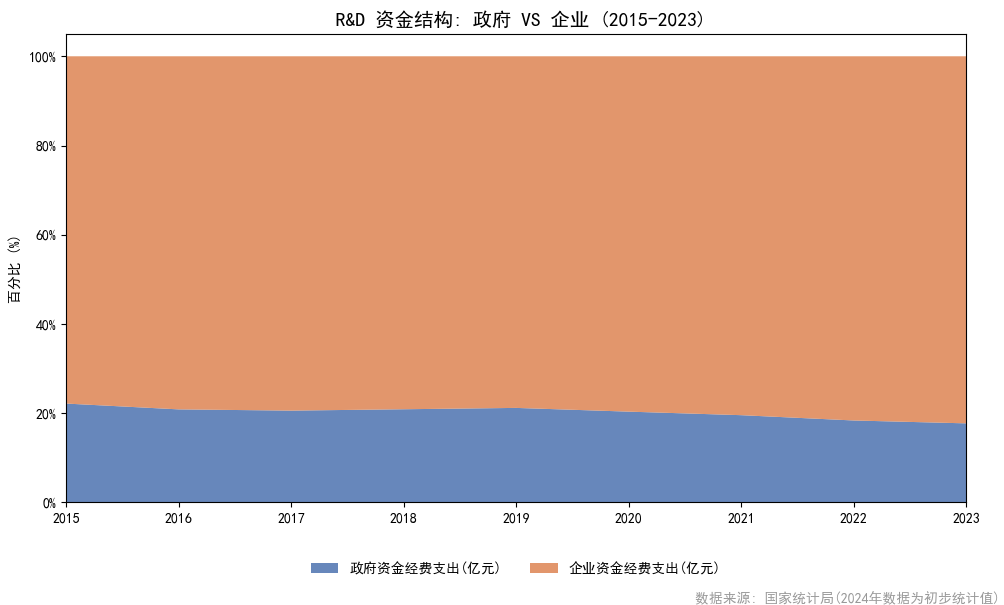

In [5]:
#--- 图3 (政府和企业投入经费对比图) ---
#数据处理
government=df_structure['研究与试验发展政府资金经费支出(亿元)']
enterprise=df_structure['研究与试验发展企业资金经费支出(亿元)']
total=government+enterprise
#计算占比 (%)

gov_pct=(government/total)*100
ent_pct=(enterprise/total)*100

fig,ax=plt.subplots(figsize=(10,6))
ax.stackplot(years_input,gov_pct,ent_pct,labels=['政府资金经费支出(亿元)','企业资金经费支出(亿元)'],colors=['#4c72b0', '#dd8452'], alpha=0.85) #创建堆叠图
ax.set_title(" R&D 资金结构: 政府 VS 企业 (2015-2023)",fontsize=14)
ax.set_ylabel("百分比 (%)")
ax.yaxis.set_major_formatter(ticker.PercentFormatter())
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2, frameon=False) #upper center作为描点, -0.1在x轴下方,ncol排成2列
ax.margins(x=0) #把x轴两边的空白部分去除
plt.tight_layout() #整个图自动紧密排版，避免子图之间的内容互相遮挡

#右下角添加数据来源
plt.annotate(
    "数据来源: 国家统计局(2024年数据为初步统计值)",
    xy=(1,0),xycoords='figure fraction', #以图坐标比例显示
    ha='right',va='bottom',
    fontsize=10,color='gray',alpha=0.8
)

plt.show()

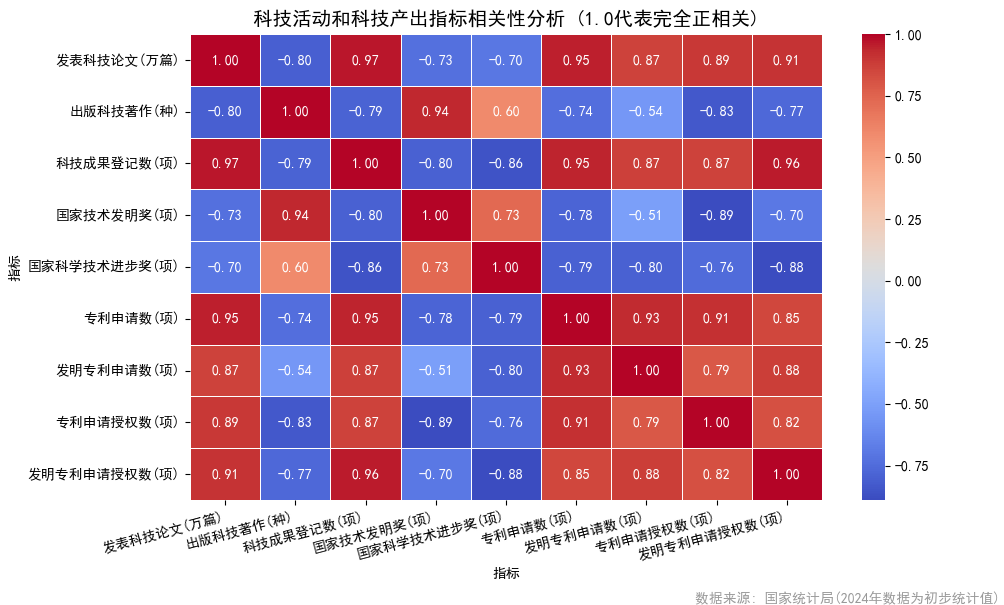

In [6]:
import seaborn as sns
import numpy as np
#提取数据
fig,ax=plt.subplots(figsize=(10,6))
#计算相关系数矩阵
corr_matrix=df_output.corr()
#子图1: 热力线性相关图
sns.heatmap(corr_matrix,
            annot=True, #格子中显示具体数值
            cmap='coolwarm',
            fmt='.2f',#保留两位小数
            linewidths=0.5,#格子之间的边线框
            ax=ax,
            annot_kws={"size":10})#格子内字体大小
ax.set_title("科技活动和科技产出指标相关性分析 (1.0代表完全正相关)",fontsize=14,fontweight="bold")
#旋转x轴标签以防重叠
plt.setp(ax.get_xticklabels(),rotation=15,ha="right")
plt.tight_layout()
#右下角添加数据来源
plt.annotate(
    "数据来源: 国家统计局(2024年数据为初步统计值)",
    xy=(1,0),xycoords='figure fraction', #以图坐标比例显示
    ha='right',va='bottom',
    fontsize=10,color='gray',alpha=0.8
)
plt.show()

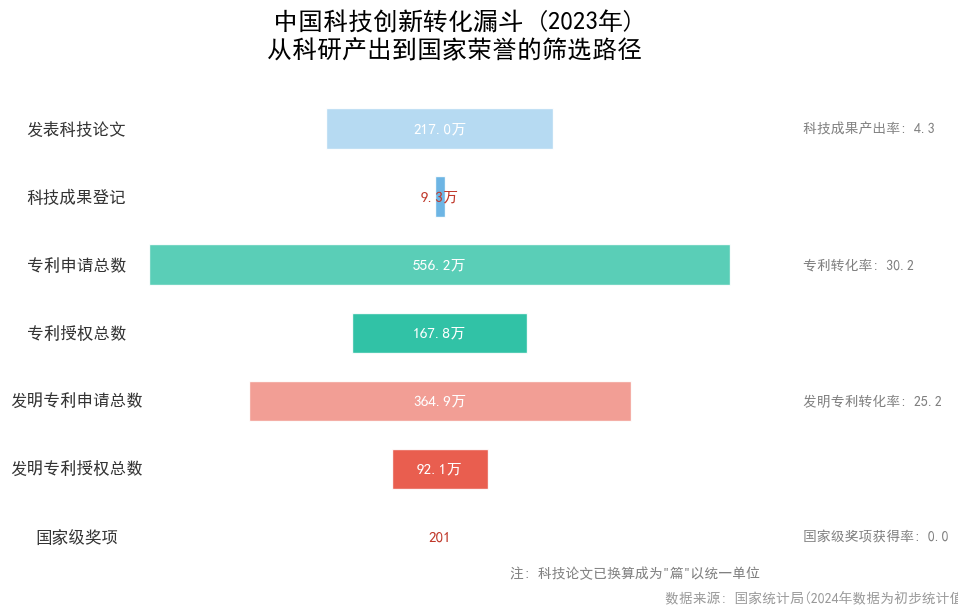

In [7]:
#子图2: 专利含金量""漏斗图"

#定义漏斗颜色(从冷色到暖色)
#颜色顺序: 浅蓝->深蓝->紫色->深紫->红->深红->金色
FUNNEL_COLORS=[
    '#AED6F1', # 论文 (海量)
    
    '#5DADE2', # 成果
    '#48C9B0', # 专利申请
    '#1ABC9C', # 发明申请 (核心)
    '#F1948A', # 专利授权
    '#E74C3C', # 发明授权 (通过)
    '#F1C40F'  # 国家奖项 (皇冠)
]
#准备漏洞数据
#关键处理1: 合并"国家奖项"
df_output['国家奖项(项)']=df_output['国家技术发明奖(项)']+df_output['国家科学技术进步奖(项)']
#关键处理2: 单位换算(万篇——>篇)
#必须统一单位，否则论文数(几百)和专利数(几百万)没办法画在一张图上
df_output['发表科技论文(篇)']=df_output['发表科技论文(万篇)']*10000

#定义漏洞的最终顺序
funnel_steps=[
    '发表科技论文(篇)', 
    '科技成果登记数(项)', 
    '专利申请数(项)', 
    '发明专利申请数(项)', 
    '专利申请授权数(项)', 
    '发明专利申请授权数(项)',
    '国家奖项(项)'
]
#简化显示的标签
step_labels=[
    '发表科技论文', 
    '科技成果登记', 
    '专利申请总数', 
    '专利授权总数',
    '发明专利申请总数', 
    '发明专利授权总数', 
    '国家级奖项'
]

fig,ax=plt.subplots(figsize=(10,6))
#绘制漏斗图
#倒序数据
y_pos=np.arange(len(funnel_steps))[::-1]
df_funnel=df_output[funnel_steps]
#print(df_funnel.iloc[8,:])#因为2024年有空白,所以我们选取2023年来进行说明
values=df_funnel.iloc[8,:].values

#计算居中绘图的参数
#让左边缘(left)等于-values/2,这样bat就会以x=0为中心
left_pos=-values/2

#绘制柱状图
bars=ax.barh(y_pos,values,left=left_pos,height=0.6,color=FUNNEL_COLORS,edgecolor='white',alpha=0.9)

#---装饰图表---
#隐藏坐标轴，只保留图形
ax.axis('off')

#添加标题
ax.set_title("中国科技创新转化漏斗 (2023年)\n从科研产出到国家荣誉的筛选路径",fontsize=18,fontweight="bold",pad=20)


#添加标签和数值
for bar,label,value in zip(bars,step_labels,values):
    #1.在左侧标注阶段名称
    ax.text(-np.max(values)/1.6, #文本的x坐标(向左偏移)
            bar.get_y()+bar.get_height()/2, #文本的y坐标(条形中间)
            label, #要显示的文字
            ha='center',#文本右边对准给定的x坐标
            va='center',#文字在条形高度中间
            fontsize=12,fontweight='bold',color='#333')
    
    #2.在中间标注: 具体数值
    # 格式化数值: 如果超过1万,用万作单位,否则直接显示
    text_color = 'white' if value > np.max(values) * 0.1 else '#C0392B' # 小数值用深红色高亮
    if value>10000:
        val_str=f"{value/10000:.1f}万"
    else:
        val_str=f"{int(value)}"
    ax.text(0,
            bar.get_y()+bar.get_height()/2,
            val_str,
            ha='center',
            va='center',
            fontsize=11,
            color=text_color)   
    
#3. 在右侧标注转化率 (相较于上一级的比例)
# 科技成果转化率
tech_rate=values[1]/values[0]*100
ax.text(np.max(values)/1.6,
                bars[0].get_y()+bars[0].get_height()/2,
                f"科技成果产出率: {tech_rate:.1f}",
                ha="left",
                va="center",
                fontsize=10,
                color="gray")

#专利转化率
pa_rate=values[3]/values[2]*100
ax.text(np.max(values)/1.6,
                bars[2].get_y()+bars[2].get_height()/2,
                f"专利转化率: {pa_rate:.1f}",
                ha="left",
                va="center",
                fontsize=10,
                color="gray")

#发明专利转化率
inpa_rate=values[5]/values[4]*100
ax.text(np.max(values)/1.6,
                bars[4].get_y()+bars[4].get_height()/2,
                f"发明专利转化率: {inpa_rate:.1f}",
                ha="left",
                va="center",
                fontsize=10,
                color="gray")

#国家奖项转化率
na_rate=values[6]/(values[0]+values[2])*100
ax.text(np.max(values)/1.6,
                bars[6].get_y()+bars[6].get_height()/2,
                f"国家级奖项获得率: {na_rate:.1f}",
                ha="left",
                va="center",
                fontsize=10,
                color="gray")



#右下角添加标记
ax.text(
1, 0,
'注: 科技论文已换算成为"篇"以统一单位',
transform=ax.transAxes,
ha='right', va='bottom',
fontsize=10,
color='gray'
)

plt.tight_layout()

# ---------- figure 右下角数据来源 ----------
plt.annotate(
    "数据来源: 国家统计局(2024年数据为初步统计值)",
    xy=(0.97,0),xycoords='figure fraction', #以图坐标比例显示
    ha='right',va='bottom',
    fontsize=10,color='gray',alpha=0.8
)
plt.show()

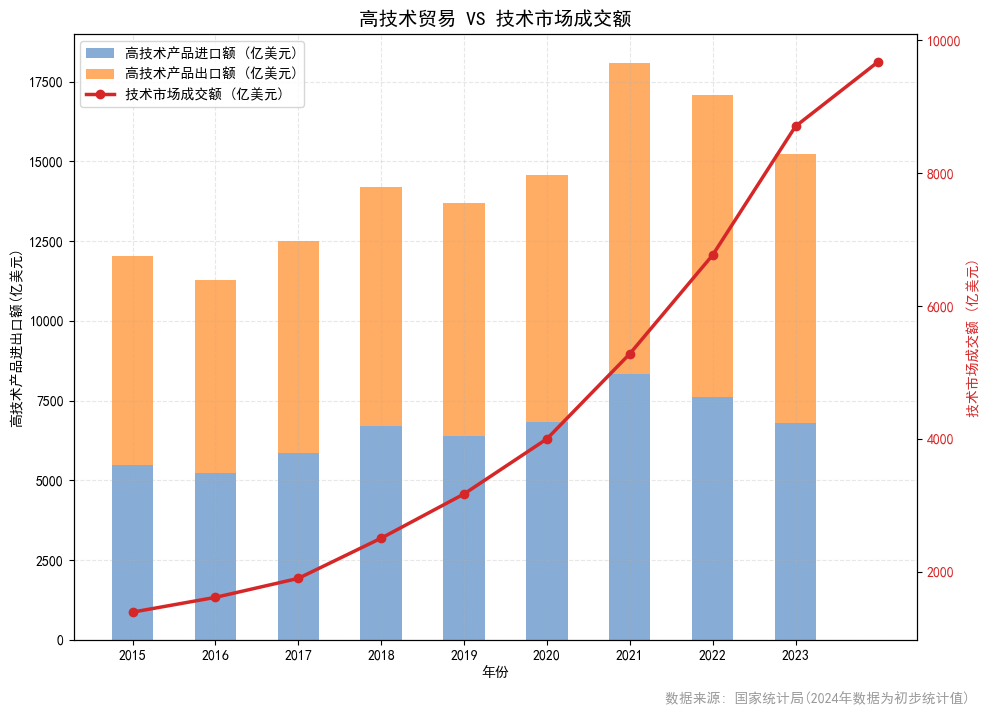

In [8]:
# ---数据组 A: 进出口贸易 ---
trade_indicators=[
    '高技术产品出口额(亿美元)',
    '高技术产品进口额(亿美元)',
    '高技术产品进出口额(亿美元)',
    '技术市场成交额(亿元)'
]


df_trade=get_time_series(df,trade_indicators)
#把亿元转化成亿美元
df_trade['技术市场成交额(亿美元)']=df_trade['技术市场成交额(亿元)']/7.0631

#--- 4 画图---
fig,ax=plt.subplots(figsize=(10,7))
exports=df_trade['高技术产品出口额(亿美元)']
imports=df_trade['高技术产品进口额(亿美元)']
market=df_trade['技术市场成交额(亿美元)']

bar_width=0.5
#绘图
p1=ax.bar(years_input,imports,width=bar_width,label="高技术产品进口额 (亿美元)", color='#729ece', alpha=0.85)
p2=ax.bar(years_input,exports,width=bar_width, bottom=imports, label='高技术产品出口额 (亿美元)', color='#ff9e4a', alpha=0.85)

ax.set_xlabel("年份")
ax.set_ylabel("高技术产品进出口额(亿美元)")
ax.set_title("高技术贸易 VS 技术市场成交额",fontsize=14)

ax2=ax.twinx()
p3=ax2.plot(years_input,market,color='#d62728', linewidth=2.5, marker='o', label='技术市场成交额 (亿美元)')
ax2.set_ylabel('技术市场成交额 (亿美元)', color='#d62728')
ax2.tick_params(axis='y', labelcolor='#d62728') #设置右边y轴刻度为红色
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines + lines2, labels + labels2, loc='upper left')

ax.set_xticks(years_input[:-1])
ax.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()

# ---------- figure 右下角数据来源 ----------
plt.annotate(
    "数据来源: 国家统计局(2024年数据为初步统计值)",
    xy=(0.97,0),xycoords='figure fraction', #以图坐标比例显示
    ha='right',va='bottom',
    fontsize=10,color='gray',alpha=0.8
)
plt.show()